# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Maulana Bintang Pamungkas
- **Email:** bintang.maulana29@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Seberapa banyak seseorang yang memilih registered(rental) dibandingkan dengan casual(sewa)??

## Import Semua Packages/Library yang Digunakan

In [5]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
# Memuat data day
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# Memuat data hour
hour_data = pd.read_csv("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [14]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_data.
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_data.
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
# mengecek missing value di dataset day_data
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
# mengecek missing value di dataset hour_data
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
# memeriksa duplicate data pada day_data
print("Jumlah duplikasi pada data day: ", day_data.duplicated().sum())

Jumlah duplikasi pada data day:  0


In [24]:
# memeriksa duplicate data pada hour_data
print("Jumlah duplikasi pada data hour: ", day_data.duplicated().sum())

Jumlah duplikasi pada data hour:  0



- Dengan hasil diatas menunjukkan kedua data tidak mengalami missing value
- Dengan hasil diatas menunjukkan bahwa kedua data tidak memiliki data duplicate

In [27]:
# memeriksa parameter statistik yang terdapat didalam day_data
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [29]:
# memeriksa parameter statistik yang terdapat didalam hour_data
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Saya akan menghapus kolom instant dan workingday dikarenakan data workingday sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya dengan proses yang akan dijalankan atau dengan kata lain tidak dipakai.- 
Disini kita akan menggunakan tipe data int menjadii category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit.
- Disini saya akan mengubah tipe data dteday yang tadinya 'object'  menjadi 'datetime'
- Mengganti nama kolom agar lebih mudah dibaca
- Mengkonversi isi kolom agar mudah dipahami
- Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdaysekdays

#### Drop Data

In [34]:
# Menghapus kolom instant dan workingday  
hour_data.drop(['workingday'], axis = 1, inplace= True)
day_data.drop(['workingday'], axis = 1, inplace= True)

#### Mengubah Tipe Data

In [37]:
# Merubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_data[column] =  day_data[column].astype("category")
    hour_data[column] =  hour_data[column].astype("category")

In [39]:
# Mengubah tipe data dteday yang tadinya 'object' menjadi 'datetime'
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

#### Mengubah Nama Kolom

Mengganti nama kolom agar lebih mudah dibaca di dataset day_data dan hour_data

In [43]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_data
day_data.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [45]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_data
hour_data.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [47]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    int64         
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   one_of_week        731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  wind_speed         731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_cr  

In [49]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_data
hour_data.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [51]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  int64         
 4   month              17379 non-null  category      
 5   hours              17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   one_of_week        17379 non-null  category      
 8   weather_situation  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  wind_speed         17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

In [53]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_data['season'] = day_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_data['season'] = hour_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2582356950.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['season'] = day_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2582356950.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['season'] = hour_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


In [55]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_data['month']= day_data['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
hour_data['month']= hour_data['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2764103581.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['month']= day_data['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2764103581.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['month']= hour_data['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [57]:
# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_data['weather_situation']= day_data['weather_situation'].replace({1: 'Clear',2: 'Misty',3: 'Light_rainsnow',4: 'Heavy_rainsnow'})
hour_data['weather_situation']= hour_data['weather_situation'].replace({1: 'Clear',2: 'Misty',3: 'Light_rainsnow',4: 'Heavy_rainsnow'})
# konversi year menjadi: 0:2011, 1:2012
day_data['year']= day_data['year'].replace({0: '2011',1: '2012'})
hour_data['year']= hour_data['year'].replace({0: '2011',1: '2012'})

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2179435042.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['weather_situation']= day_data['weather_situation'].replace({1: 'Clear',2: 'Misty',3: 'Light_rainsnow',4: 'Heavy_rainsnow'})
C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\2179435042.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['weather_situation']= hour_data['weather_situation'].replace({1: 'Clear',2: 'Misty',3: 'Light_rainsnow',4: 'Heavy_rainsnow'})


In [59]:
# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_data['one_of_week']= day_data['one_of_week'].replace({1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'})
hour_data['one_of_week']= hour_data['one_of_week'].replace({1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'})

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\97408271.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['one_of_week']= day_data['one_of_week'].replace({1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'})
C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\97408271.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_data['one_of_week']= hour_data['one_of_week'].replace({1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'})


In [61]:
# konversi year menjadi: 0:2011, 1:2012
day_data['year']= day_data['year'].replace({0: '2011',1: '2012'})
hour_data['year']= hour_data['year'].replace({0: '2011',1: '2012'})

In [63]:
# Menghitung Humidity
day_data['humidity'] = day_data['humidity']*100
hour_data['humidity'] = hour_data['humidity']*100

#### Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays

In [66]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_data["category_days"] = hour_data["one_of_week"].apply(get_category_days)
day_data["category_days"] = day_data["one_of_week"].apply(get_category_days)

In [68]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_data["humidity_category"] = hour_data["humidity"].apply(classify_humidity)
day_data["humidity_category"] = day_data["humidity"].apply(classify_humidity)

- sudah menghapus kolom instant dan workingday ✓
- tipe data pada kolom dteday sudah berubah menjadi datetime ✓
- tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data category ✓
- Sudah mengganti nama kolom agar lebih mudah dibaca ✓
- Sudah Mengkonversi isi kolom agar mudah dipahami ✓
- Sudah membuat kolom baru bernama category_days yang berisi weekend atau weekdays ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_data

In [73]:
# melihat parameter statistik dari data hour_data 
hour_data.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Friday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14900,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, akan diperoleh informasi jumlah pelanggan sebanyak 17379. Berdasarkan data yang ditampilkan range antara jam 00.00 sampai 23.59, memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.914

In [76]:
# penyewaan berdasarkan jam
hour_data.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan data diatas menunjukkan bahwa pelanggan yang memilliki banyak penyewa sepeda terjadi pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

### Explore Data day_data

In [80]:
# melihat parameter statistik dari data day_data
day_data.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,0.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [82]:
# melihat jumlah penyewaan tiap musim 
day_data.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\507490002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_data.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [84]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
day_data.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan data tersebut, diketahui bahwa season fall dan summer merupakan dua musim yang memiliki jumlah terbanyak.

In [87]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
day_data.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


berdasarkan data diatas, seseorang yang sudah menjadi member dengan belum menjadi member memiliki nilai yang cukup jauh, seseorang yang sudah mempunyai member pada tahun 2011 sebanyak 995851 sedangkan yang belum menjadi member sebanyak 247252

## Visualization & Explanatory Analysis
- pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Seberapa banyak seseorang yang memilih registered(rental) dibandingkan dengan casual(sewa)??

In [102]:
# cek nilai unique hari dalam 'one_of_week' column
day_data['one_of_week'].unique()

['Friday', 0, 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
Categories (7, object): [0, 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [104]:
# ganti 0 dengan 'Saturday' dalam 'one_of_week' column
day_data['one_of_week'] = day_data['one_of_week'].replace(0, 'Saturday')

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\3788819448.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_data['one_of_week'] = day_data['one_of_week'].replace(0, 'Saturday')


In [108]:
day_data['one_of_week'].unique()

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
Categories (7, object): ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [120]:
day_data.to_csv('day_cleaned.csv', index=False)

In [122]:
hour_data.to_csv('hour_cleaned.csv', index=False)

### Pertanyaan 1:

C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\3689236008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rental_totals = day_data.groupby('one_of_week')['count_cr'].sum().reset_index()
C:\Users\Bintang\AppData\Local\Temp\ipykernel_13000\3689236008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='one_of_week', y='count_cr', data=day_rental_totals, palette='coolwarm')


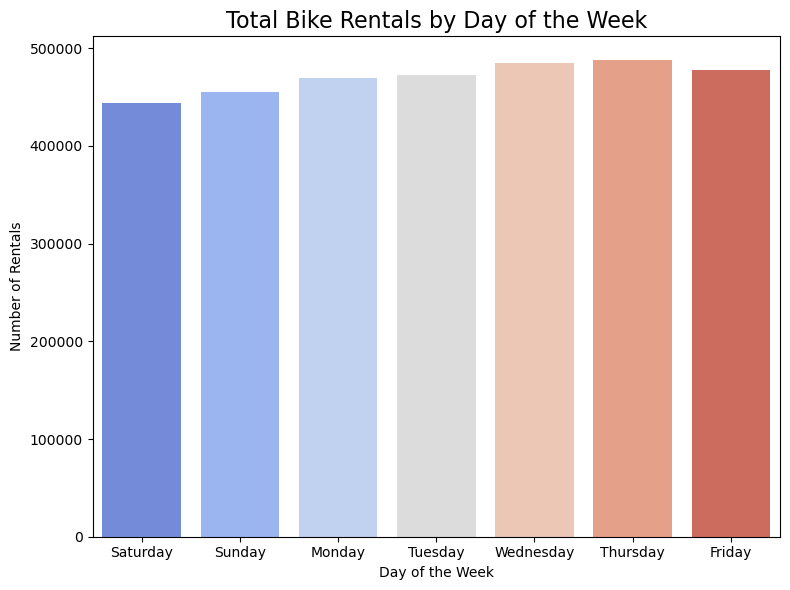

In [111]:
day_rental_totals = day_data.groupby('one_of_week')['count_cr'].sum().reset_index()

day_rental_totals = day_rental_totals.sort_values(by='count_cr', ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(x='one_of_week', y='count_cr', data=day_rental_totals, palette='coolwarm')

plt.title('Total Bike Rentals by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')

plt.tight_layout()
plt.show()

Berdasarkan data diatas menunjukkan bahwa penyewaan sepeda terbanyak di hari thursday dan penyewaan sepeda terdikit di hari saturday

### Pertanyaan 2:

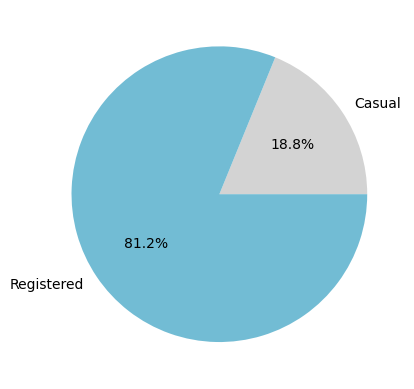

In [115]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_data['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_data['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

seseorang yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan casual sebanyak 18.8%

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan data diatas menunjukkan bahwa penyewaan sepeda terbanyak di hari thursday dan penyewaan sepeda terdikit di hari saturday
- Conclution pertanyaan 2 : Orang yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%